<a href="https://colab.research.google.com/github/Paras1242/Object-Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision
!pip install opencv-contrib-python

In [ ]:
import torch
from torchvision import models
from torchvision import transforms
import cv2
import json
import re
import numpy as np
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone
from google.colab.patches import cv2_imshow
backbone = resnet_fpn_backbone('resnet50', pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676

cpu


In [ ]:
from google.colab.patches import cv2_imshow

with open("/content/coco-labels-2014_2017.txt") as f:
    labels = [line.strip() for line in f.readlines()]
COLORS = np.random.uniform(0, 255, size=(len(labels), 3))

num_classes = len(labels)

model = fasterrcnn_resnet50_fpn(pretrained=True,progress=True,
	num_classes=num_classes, pretrained_backbone=True).to(device)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weigh

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

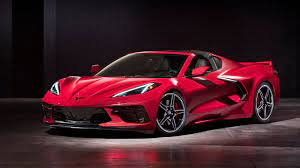

Detected object: Class index: 3, Label: car
Detected object: Class index: 3, Label: car
Detected object: Class index: 3, Label: car
Detected object: Class index: 3, Label: car
Detected object: Class index: 33, Label: suitcase
Detected object: Class index: 3, Label: car
Detected object: Class index: 27, Label: backpack
Detected object: Class index: 3, Label: car
Detected object: Class index: 65, Label: bed
Detected object: Class index: 4, Label: motorbike
[INFO] car: 96.93%


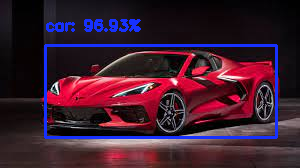

In [ ]:
image_path = "/content/car.jpeg"
image = cv2.imread(image_path)
cv2_imshow(image)
orignal = image.copy()
# convert the image from BGR to RGB channel ordering and change the
# image from channels last to channels first ordering
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = image.transpose((2, 0, 1))
# add the batch dimension, scale the raw pixel intensities to the
# range [0, 1], and convert the image to a floating point tensor
image = np.expand_dims(image, axis=0)
image = image / 255.0

image = torch.FloatTensor(image)
# send the input to the device and pass the it through the network to
# get the detections and predictions
image = image.to(device)

# Perform inference

result = model(image)
predictions = result[0]

labels_pred = predictions['labels'].cpu().numpy()

for i in range(0, len(predictions["boxes"])):

	confidence = predictions["scores"][i]

	if confidence > 0.6:

		idx = int(predictions["labels"][i])
		box = predictions["boxes"][i].detach().cpu().numpy()
		(startX, startY, endX, endY) = box.astype("int")

		label = "{}: {:.2f}%".format(labels[idx-1], confidence * 100)
		print("[INFO] {}".format(label))

		cv2.rectangle(orignal, (startX, startY), (endX, endY),
			COLORS[idx], 2)
		y = startY - 15 if startY - 15 > 15 else startY + 15
		cv2.putText(orignal, label, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
cv2_imshow(orignal)
